<a href="https://colab.research.google.com/github/DavidAshraf/Logo-Classifier/blob/master/Logo_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pillow==4.1.1
!pip install torchvision

    100% |████████████████████████████████| 5.7MB 6.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 591.8MB 26kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61448000 @  0x7fd47ca942a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641


In [0]:
from torchvision import transforms, models, datasets
import torch
import numpy as np 
from google.colab import drive
import matplotlib.pyplot as plt


In [3]:
drive.mount('/content/drive', force_remount=True)
drive_root = '/content/drive/My Drive/Logo-Classifier/'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#Download data
root = 'http://www.multimedia-computing.de/flickrlogos/data/'
flickr47_train = root + 'FlickrLogos-32_dataset_v2.zip'
!wget {flickr47_train}
!unzip FlickrLogos-32_dataset_v2.zip
!ls


--2019-01-03 10:09:46--  http://www.multimedia-computing.de/flickrlogos/data/FlickrLogos-32_dataset_v2.zip
Resolving www.multimedia-computing.de (www.multimedia-computing.de)... 137.250.173.18
Connecting to www.multimedia-computing.de (www.multimedia-computing.de)|137.250.173.18|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3363984300 (3.1G) [application/zip]
Saving to: ‘FlickrLogos-32_dataset_v2.zip’

FlickrLogos-32_data 100%[===================>]   3.13G  3.25MB/s    in 17m 1s  

2019-01-03 10:26:49 (3.14 MB/s) - ‘FlickrLogos-32_dataset_v2.zip’ saved [3363984300/3363984300]

Archive:  FlickrLogos-32_dataset_v2.zip
   creating: FlickrLogos-v2/
  inflating: FlickrLogos-v2/all.filenames.txt  
  inflating: FlickrLogos-v2/all.relpaths.txt  
  inflating: FlickrLogos-v2/all.spaces.txt  
  inflating: FlickrLogos-v2/all.txt  
   creating: FlickrLogos-v2/classes/
   creating: FlickrLogos-v2/classes/jpg/
   creating: FlickrLogos-v2/classes/jpg/adidas/
  inflating: Fli

In [5]:
!ls FlickrLogos-v2/classes/jpg

adidas	carlsberg  erdinger  fosters   milka	 rittersport   texaco
aldi	chimay	   esso      google    no-logo	 shell	       tsingtao
apple	cocacola   fedex     guiness   nvidia	 singha        ups
becks	corona	   ferrari   heineken  paulaner  starbucks
bmw	dhl	   ford      HP        pepsi	 stellaartois


In [0]:
normalize = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

train_transforms = transforms.Compose([transforms.RandomResizedCrop(224),
                                       transforms.ColorJitter(saturation=0.3),
                                      transforms.RandomRotation(30),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      normalize])

valid_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      normalize])

In [15]:
dataset =  datasets.ImageFolder('FlickrLogos-v2/classes/jpg', transform=train_transforms)
trainset = datasets.ImageFolder('FlickrLogos-v2/classes/jpg', transform=train_transforms)
validset = datasets.ImageFolder('FlickrLogos-v2/classes/jpg', transform=valid_transforms)
testset = datasets.ImageFolder('FlickrLogos-v2/classes/jpg', transform=valid_transforms)


# Shuffling and Splitting Dataset
np.random.seed(0)
torch.manual_seed(0)
dataset_size = len(dataset)
train_split= 0.8
validate_split = 0.1
test_split = 0.1
train_size = int(train_split * dataset_size)
validation_size = int(validate_split * dataset_size)
test_size = int(dataset_size - train_size - validation_size)


indices = list(range(dataset_size))
np.random.shuffle(indices)
train_indices = indices[:train_size]
temp = int(train_size+validation_size)
val_indices = indices[train_size:temp]
test_indices = indices[temp:]

print("Full set size:", len(trainset))

trainset = torch.utils.data.Subset(trainset, train_indices)
validset = torch.utils.data.Subset(validset, val_indices)
testset = torch.utils.data.Subset(testset, test_indices)

print("Train set size:", len(trainset))
print("Valid set size:", len(validset))
print("Test set size:", len(testset))

batch_size = 512
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
validloader = torch.utils.data.DataLoader(validset, batch_size=64)
testloader = torch.utils.data.DataLoader(testset, batch_size=64)

Full set size: 8240
Train set size: 6592
Valid set size: 824
Test set size: 824


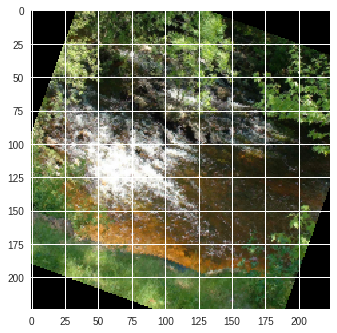

In [16]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax
  
im, l = next(iter(trainloader))
i = im[1]
imshow(i)

In [0]:
classifier = torch.nn.Sequential(torch.nn.Linear(2048, 1024),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(p=0.3),
                                 torch.nn.Linear(1024, 512),
                                 torch.nn.ReLU(),
                                 torch.nn.Dropout(p=0.3),
                                 torch.nn.Linear(512, 33),
                                 torch.nn.LogSoftmax(dim=1))

model = models.resnet152(pretrained=True)
# Freezing Parameters
for parameter in model.parameters():
    parameter.requires_grad = False
    
# Replacing the classifier layer
model.fc = classifier

criterion = torch.nn.NLLLoss()
lr =0.001
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [0]:
weight_decay=0.25

In [0]:
def reduce_lr(optimizer,lr):
  for param_group in optimizer.param_groups:
    param_group['lr'] = lr

In [0]:
def convert_to_adamw(weight_decay):
  for group in optimizer.param_groups:
    for param in group['params']:
        param.data = param.data.add(-weight_decay * group['lr'], param.data)

In [0]:
# Training

def train(model, criterion, optimizer, scheduler, start_epoch, epochs, cp, cp_path,lr,best=np.Inf,last_epoch=-1):
  model.to('cuda')
  min_validation_loss = best
  train_losses_list = []
  valid_losses_list = []
  last_saved_epoch = last_epoch
  for e in range(start_epoch, epochs+1):
    
    train_losses = 0
    train_accuracy = 0
    validation_losses = 0
    validation_accuracy = 0
#     scheduler.step()
    model.train()

    for images, labels in trainloader:
      images, labels = images.to('cuda'), labels.to('cuda')

      optimizer.zero_grad()
      log_ps = model(images)
      loss = criterion(log_ps, labels)

      loss.backward()
      convert_to_adamw(weight_decay)
      optimizer.step()
      train_losses += loss.item() * images.size(0)
      
      ps = torch.exp(log_ps)
      top_ps, top_class = ps.topk(1, dim=1)
      equal = top_class == labels.view(*top_class.shape)
      train_accuracy += torch.sum(equal.type(torch.FloatTensor))



    model.eval()  
    with torch.no_grad():  
      for images, labels in validloader:
        images, labels = images.to('cuda'), labels.to('cuda')

        log_ps = model(images)
        loss = criterion(log_ps, labels) 
        validation_losses += loss.item() * images.size(0)

        ps = torch.exp(log_ps)
        top_ps, top_class = ps.topk(1, dim=1)
        equal = top_class == labels.view(*top_class.shape)
        validation_accuracy += torch.sum(equal.type(torch.FloatTensor))

    train_losses_list.append(train_losses/len(trainloader.dataset))
    valid_losses_list.append(validation_losses/len(validloader.dataset))

    print("Epoch: {}\t Training Loss: {}\t Training Accuracy: {}\t Validation Loss: {}\t Validation Accuracy: {}\t".format(
         e+1,
         train_losses/len(trainloader.dataset),
         100*train_accuracy/len(trainloader.dataset),
         validation_losses/len(validloader.dataset),
         100*validation_accuracy/len(validloader.dataset)))

    if validation_losses <= min_validation_loss:
      min_validation_loss = validation_losses
      last_saved_epoch=e
      print("Saving Model")
      cp['state_dict'] = model.state_dict()
      cp['optimizer'] = optimizer.state_dict()
      cp['epochs'] = e+1
      cp['loss'] = validation_losses
      cp['accuracy'] = validation_accuracy
      torch.save(cp, cp_path)
    else:
      if last_saved_epoch != -1:
        if (e-last_saved_epoch) % 2 == 0:
          lr = lr * 0.7
          reduce_lr(optimizer,lr)
          print('Learning rate reduced to :{:.8f}'.format(lr))

  
  plt.plot(train_losses_list, label='T')
  plt.plot(valid_losses_list, label='V')
  plt.legend(frameon=False)

Epoch: 1	 Training Loss: 1.6260988816474249	 Training Accuracy: 67.0206298828125	 Validation Loss: 1.1256836652755737	 Validation Accuracy: 75.48543548583984	
Saving Model
Epoch: 2	 Training Loss: 1.178266108614727	 Training Accuracy: 72.51213836669922	 Validation Loss: 1.0373155850808597	 Validation Accuracy: 76.9417495727539	
Saving Model
Epoch: 3	 Training Loss: 1.0973375138727206	 Training Accuracy: 73.51335144042969	 Validation Loss: 0.8609812867294238	 Validation Accuracy: 77.0631103515625	
Saving Model
Epoch: 4	 Training Loss: 1.0001311018628982	 Training Accuracy: 74.28701782226562	 Validation Loss: 0.7782985487030548	 Validation Accuracy: 78.51941680908203	
Saving Model
Epoch: 5	 Training Loss: 0.9202201395358854	 Training Accuracy: 76.09223175048828	 Validation Loss: 0.7305955811611657	 Validation Accuracy: 81.31067657470703	
Saving Model
Epoch: 6	 Training Loss: 0.8594449961069718	 Training Accuracy: 77.7457504272461	 Validation Loss: 0.6518790079551993	 Validation Accuracy:

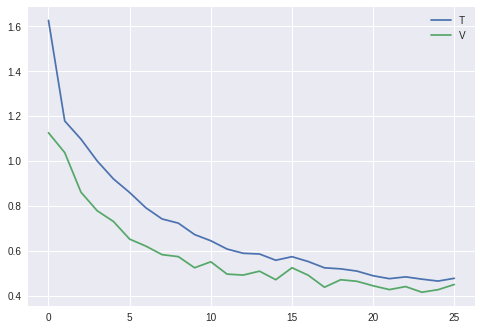

In [18]:
cp = {'class_to_idx':dataset.class_to_idx,
      'model':models.resnet152(pretrained=True),
      'classifier':classifier,
      'batch_size':batch_size}
cp_path = drive_root + 'aug3.pt'

model.class_to_idx = dataset.class_to_idx

train(model, criterion, optimizer, None, 0, 25, cp, cp_path,lr=lr)

Epoch: 28	 Training Loss: 0.4801235656136448	 Training Accuracy: 87.6213607788086	 Validation Loss: 0.6287695018990526	 Validation Accuracy: 84.708740234375	
Saving Model
Epoch: 29	 Training Loss: 0.38162762042388176	 Training Accuracy: 90.15473175048828	 Validation Loss: 0.30789051798072836	 Validation Accuracy: 92.11164855957031	
Saving Model
Epoch: 30	 Training Loss: 0.3291254879780186	 Training Accuracy: 91.94477844238281	 Validation Loss: 0.31573908942417034	 Validation Accuracy: 90.65534210205078	
Epoch: 31	 Training Loss: 0.280849145309439	 Training Accuracy: 92.97633361816406	 Validation Loss: 0.3089201773688631	 Validation Accuracy: 92.71844482421875	
Learning rate reduced to :0.00007000
Epoch: 32	 Training Loss: 0.25527586636034033	 Training Accuracy: 93.29490661621094	 Validation Loss: 0.2667106536117572	 Validation Accuracy: 92.71844482421875	
Saving Model
Epoch: 33	 Training Loss: 0.24436306837693	 Training Accuracy: 93.56796264648438	 Validation Loss: 0.23695939967354523	

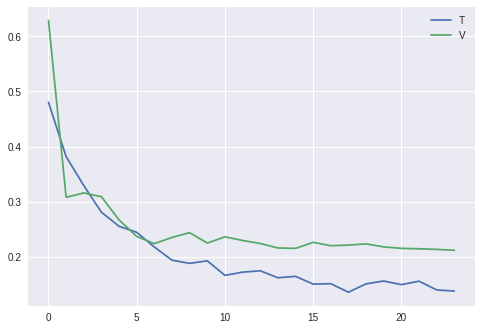

In [23]:
checkpoint = torch.load(cp_path)
model.load_state_dict(checkpoint['state_dict'])
best_loss = np.min(np.array(checkpoint['loss']))
last_epoch=checkpoint['epochs']-1
list_children = list(model.children())[:-3]
optimizer.load_state_dict(checkpoint['optimizer'])
#unfreezing all layers
for param in model.parameters():
  param.requires_grad=True
#freezing all layers but the last 3 layers
for child in list_children:
  for param in child.parameters():
    param.requires_grad=False
train(model, criterion, optimizer, None, 27, 50, checkpoint, cp_path,lr=lr*0.1)